In [1]:
from sys import maxsize
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from log_reg_utils import sigmoid

In [2]:
iris_dataset = datasets.load_iris()
raw_features = iris_dataset.data
y = iris_dataset.target
raw_features.shape, y.shape

((150, 4), (150,))

The first two classes in the iris dataset are linearly-separable. For demo purpose here,<br>
- take only those two classes to show linear separation in a plot.
- take only 2 features to show linear separation in a 2D feature space.
- take samples in columns instead of rows for convention.

In [3]:
X = raw_features[0:100, 0:2].T
y = y[0:100]
X.shape, y.shape

((2, 100), (100,))

Visually observe the linearly-separable data set before searching for parameters w.

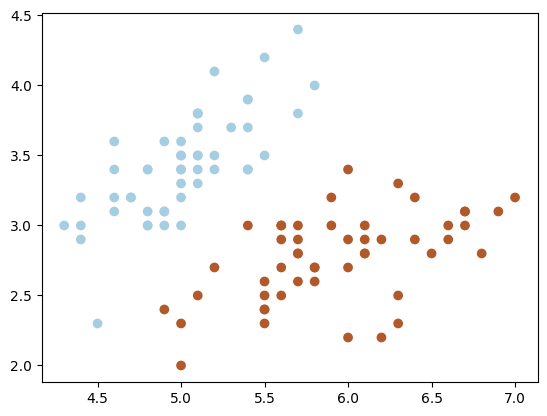

In [4]:
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Paired)

#### Feature Transformation

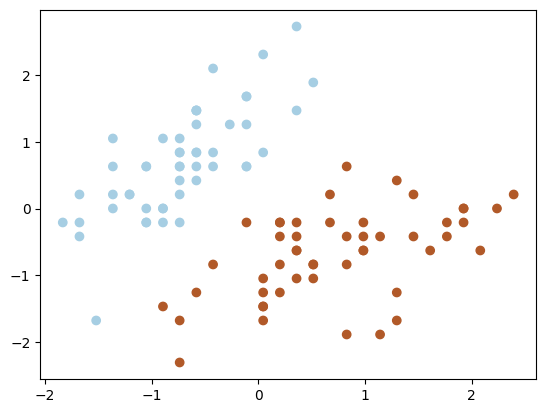

In [5]:
scaler = StandardScaler()
scaler.fit(X.T)
X = scaler.transform(X.T).T
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Paired)

Furthermore, we also want to add a bias term to the training samples.

In [6]:
x_0 = np.array([1.0] * X.shape[1])
x_0 = x_0.reshape((1, 100))
x_0.shape

(1, 100)

In [7]:
X = np.vstack((x_0, X))
X.shape

(3, 100)

In [8]:
# observe samples in columns
X[:, 0:2]

array([[ 1.        ,  1.        ],
       [-0.5810659 , -0.89430898],
       [ 0.84183714, -0.2078351 ]])

#### Batch Gradient Descent on Negative Log Likelihood

In [9]:
w = np.array([[0.0, 0.0, 1.0]]).T
w

array([[0.],
       [0.],
       [1.]])

Before training, let us observe the decision boundary in feature space.

In [10]:
def plot_sep(feature_1, feature_2, labels, w0=0, w1=1, w2=1):
    plt.figure(figsize=(7, 5))
    # Plot samples of different classes with different colors
    unique_labels = np.unique(labels)
    for label in unique_labels:
        class_mask = labels == label
        plt.scatter(
            feature_1[class_mask],
            feature_2[class_mask],
            marker="o",
            label=f"Class {label}",
        )

    # Plot the decision boundary line based on the coefficients (w0 + w1 * x1 + w2 * x2 = 0)
    decision_bdry_x_vals = np.linspace(feature_1.min() - 1, feature_1.max() + 1, 100)
    decision_bdry_y_vals = (-w0 - w1 * decision_bdry_x_vals) / w2
    plt.plot(
        decision_bdry_x_vals,
        decision_bdry_y_vals,
        color="r",
        linestyle="--",
        label="Decision Boundary",
    )

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("Decision Boundary with Scatter Plot")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

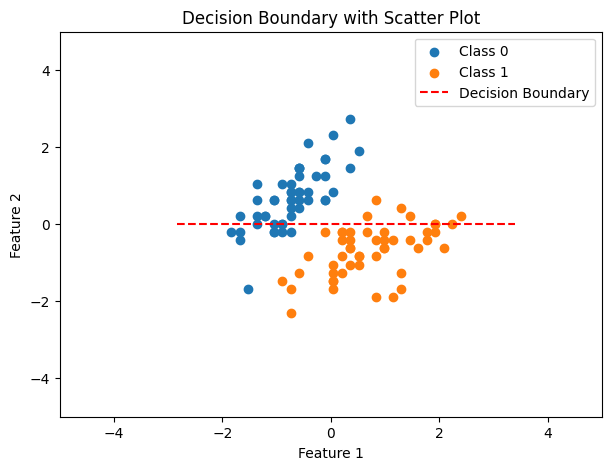

In [11]:
# decision boundary with initial weights
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=w[0].item(),
    w1=w[1].item(),
    w2=w[2].item(),
)

Initially, the decision boundary given by the initialized weights is a horizontal line overlapping the feature 1 axis.

Training

In [12]:
dE_by_dw = w  # set to an arbitrary value with the same dims as dE_by_dw
ep = 0
tr_neg_LL = []
test_neg_LL = []
stopping_criteria = 0.001
lr = 0.00001
running_weights = []
running_weights.append(w)
max_eps = 1000000
while (np.linalg.norm(dE_by_dw, ord=1) > stopping_criteria) and (ep < max_eps):
    dE_by_dw = (1 / len(y)) * np.dot(
        X, (sigmoid(np.dot(X.T, w)) - y.reshape((len(X[0, :]), 1)))
    )

    w = w - lr * dE_by_dw

    # save weights periodically for observation
    if ep % (max_eps / 10) == 0:
        print("Episode: ", ep)
        running_weights.append(w)

    ep += 1

Episode:  0
Episode:  100000
Episode:  200000
Episode:  300000
Episode:  400000
Episode:  500000
Episode:  600000
Episode:  700000
Episode:  800000
Episode:  900000


In [14]:
w

array([[-0.22894148],
       [ 6.41916241],
       [-3.61347834]])

#### Trained Weights Observation
Let us observe the decision boundaries obtained over time during training.

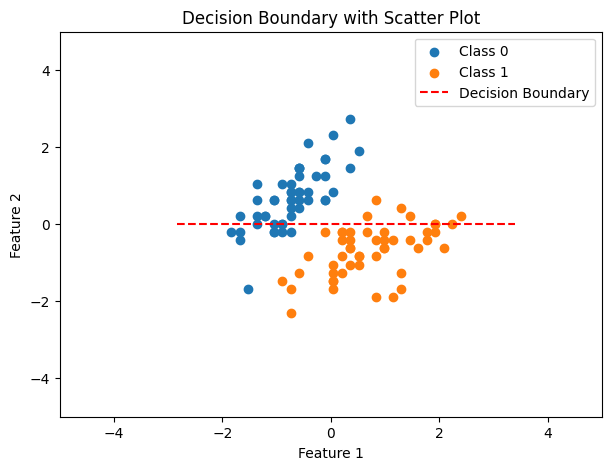

In [15]:
# before any training
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=running_weights[0][0].item(),
    w1=running_weights[0][1].item(),
    w2=running_weights[0][2].item(),
)

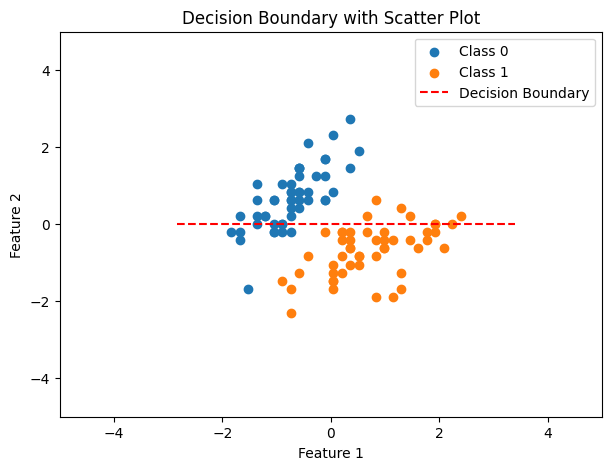

In [16]:
# after 10% of training episodes
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=running_weights[1][0].item(),
    w1=running_weights[1][1].item(),
    w2=running_weights[1][2].item(),
)

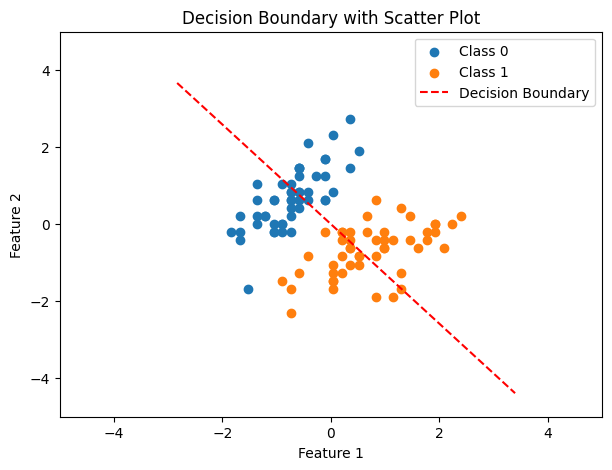

In [17]:
# after 30% of training episodes
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=running_weights[3][0].item(),
    w1=running_weights[3][1].item(),
    w2=running_weights[3][2].item(),
)

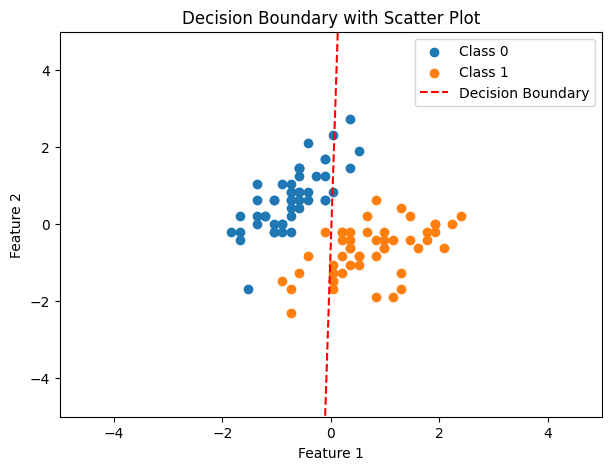

In [18]:
# after 50 % of training episodes
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=running_weights[5][0].item(),
    w1=running_weights[5][1].item(),
    w2=running_weights[5][2].item(),
)

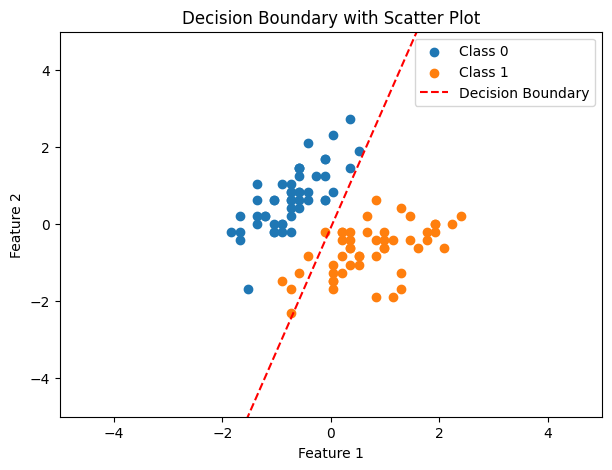

In [19]:
# after 70% of training episodes
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=running_weights[7][0].item(),
    w1=running_weights[7][1].item(),
    w2=running_weights[7][2].item(),
)

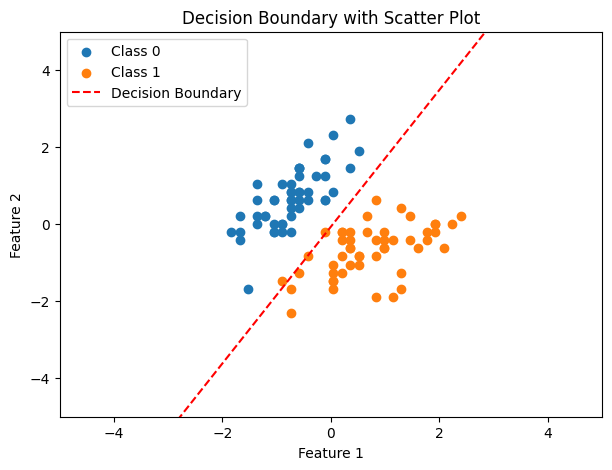

In [20]:
# final decision boundary
plot_sep(
    feature_1=X[1, :],
    feature_2=X[2, :],
    labels=y,
    w0=w[0].item(),
    w1=w[1].item(),
    w2=w[2].item(),
)

As seen above, the desired coefficients that can linearly separate the two linearly-separable classes were learned from training (ignoring the samples at the border that can be correctly classified with a better choice of learning rate).